In [79]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns

# Constants

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [5]:
PATH_DATA = Path.cwd().parent.parent.parent / 'data'
PATH_DATA.exists()

True

In [6]:
PATH_SCRAPED = PATH_DATA / "raw" / "scraped"
PATH_SCRAPED.exists()

True

In [7]:
PATH_PREPROCESSED_HM = (PATH_DATA / "preprocessed" / "human_microbiome")
PATH_PREPROCESSED_HM.exists()

True

In [8]:
PATH_TAXONOMY_HM = (PATH_SCRAPED / "human_microbiome" / "taxonomy")
PATH_TAXONOMY_HM.exists()

True

In [72]:
PATH_RESULTS = PATH_DATA / "results"
PATH_RESULTS.exists()

True

In [ ]:
PATH_STATS_SITE_HM = PATH_RESULTS / "stats" / 'human_microbiome' / 'site'
PATH_STATS_SITE_HM.exists()

True

In [78]:
PATH_STATS_TAX_HM = PATH_RESULTS / "stats" / 'human_microbiome' / 'tax'
PATH_STATS_TAX_HM.exists()

True

## Data Extraction

In [9]:
df_hm_name_formatting = pd.read_csv(PATH_PREPROCESSED_HM / 'human_microbiome_name_formatting.csv', dtype=str)
df_hm_name_formatting = df_hm_name_formatting.replace({',': '.'}, regex=True)
df_hm_name_formatting = df_hm_name_formatting.apply(pd.to_numeric, errors='ignore')
df_hm_name_formatting

C:\Users\Diego\AppData\Local\Temp\ipykernel_40232\72806326.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_hm_name_formatting = df_hm_name_formatting.apply(pd.to_numeric, errors='ignore')


,name,formatted_name_ncbi,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_piechaudii_ATCC_43553_uid46343/,NZ_GG770409,6115515,0.638748,-20.0,-63.263013,3.012524,0.992758,1.615916
1,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_piechaudii_ATCC_43553_uid46343/,NZ_GG770409,6115515,0.638748,-19.0,-60.097422,3.004871,0.992778,1.615916
2,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_piechaudii_ATCC_43553_uid46343/,NZ_GG770409,6115515,0.638748,-18.0,-56.932342,2.996439,0.992802,1.615916
3,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_piechaudii_ATCC_43553_uid46343/,NZ_GG770409,6115515,0.638748,-17.0,-53.767871,2.987104,0.992832,1.615916
4,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_piechaudii_ATCC_43553_uid46343/,NZ_GG770409,6115515,0.638748,-16.0,-50.604134,2.976714,0.992870,1.615916
...,...,...,...,...,...,...,...,...,...,...,...
37592,_Bacteroides__pectinophilus_ATCC_43243_uid27825,_Bacteroides__pectinophilus_ATCC_43243,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/_Bacteroides__pectinophilus_ATCC_43243_uid27825/,NZ_DS996921,2528381,0.418382,16.0,24.995198,1.666347,0.999600,1.447162
37593,_Bacteroides__pectinophilus_ATCC_43243_uid27825,_Bacteroides__pectinophilus_ATCC_43243,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/_Bacteroides__pectinophilus_ATCC_43243_uid27825/,NZ_DS996921,2528381,0.418382,17.0,26.579909,1.661244,0.999560,1.447162
37594,_Bacteroides__pectinophilus_ATCC_43243_uid27825,_Bacteroides__pectinophilus_ATCC_43243,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/_Bacteroides__pectinophilus_ATCC_43243_uid27825/,NZ_DS996921,2528381,0.418382,18.0,28.163527,1.656678,0.999523,1.447162
37595,_Bacteroides__pectinophilus_ATCC_43243_uid27825,_Bacteroides__pectinophilus_ATCC_43243,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/_Bacteroides__pectinophilus_ATCC_43243_uid27825/,NZ_DS996921,2528381,0.418382,19.0,29.746347,1.652575,0.999488,1.447162


## Data Preparation

In [10]:
df_composite_key_hm = df_hm_name_formatting.drop_duplicates(subset=['GC_content', 'Delta_Dq', 'sequence'])
df_composite_key_hm.shape

(917, 11)

## DeltaDq vs GC

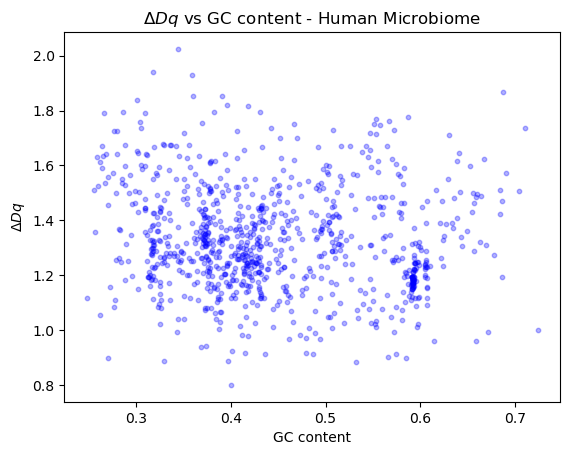

In [11]:
plt.scatter(
    x=df_composite_key_hm['GC_content'],
    y=df_composite_key_hm['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

plt.title(r'$\Delta Dq$ vs GC content - Human Microbiome')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.show()

## Taxonomy

### Data prep

In [12]:
df_tax_hm = pd.read_json(PATH_TAXONOMY_HM / 'taxonomy_hm.json', dtype=str)
df_tax_hm = df_tax_hm.rename(columns={'organism_name': 'formatted_name_ncbi'})
df_tax_hm.head()

,url,formatted_name_ncbi,no rank,superkingdom,kingdom,phylum,class,order,family,genus,species,species group,clade,subspecies
0,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=742159,Achromobacter_piechaudii_ATCC_43553,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter piechaudii,nan,nan,nan
1,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=525243,Acinetobacter_baumannii_6013150,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter baumannii,Acinetobacter calcoaceticus/baumannii complex,nan,nan
2,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=562971,Achromobacter_xylosoxidans_C54,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter xylosoxidans,nan,nan,nan
3,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=575585,Acinetobacter_calcoaceticus_RUH2202,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter calcoaceticus,Acinetobacter calcoaceticus/baumannii complex,nan,nan
4,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=575584,Acinetobacter_baumannii_ATCC_19606___CIP_70_34,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter baumannii,Acinetobacter calcoaceticus/baumannii complex,nan,nan


In [13]:
df_combined_hm = pd.merge(df_composite_key_hm, df_tax_hm, on='formatted_name_ncbi', how='left')
df_combined_hm


,name,formatted_name_ncbi,url_x,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq,url_y,no rank,superkingdom,kingdom,phylum,class,order,family,genus,species,species group,clade,subspecies
0,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_piechaudii_ATCC_43553_uid46343/,NZ_GG770409,6115515,0.638748,-20.0,-63.263013,3.012524,0.992758,1.615916,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=742159,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter piechaudii,nan,nan,nan
1,Achromobacter_xylosoxidans_C54_uid38739,Achromobacter_xylosoxidans_C54,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_xylosoxidans_C54_uid38739/,NZ_GL636060,741255,0.655275,-20.0,-60.465531,2.879311,0.981706,1.499203,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=562971,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter xylosoxidans,nan,nan,nan
2,Acidaminococcus_D21_uid34117,Acidaminococcus_D21,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Acidaminococcus_D21_uid34117/,NZ_ACGB01000001,138060,0.488853,-20.0,-55.118059,2.624669,0.986374,1.070254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acinetobacter_ATCC_27244_uid30949,Acinetobacter_ATCC_27244,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Acinetobacter_ATCC_27244_uid30949/,NZ_GG665949,481320,0.378322,-20.0,-60.156267,2.864584,0.985111,1.249041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Acinetobacter_baumannii_6013113_uid33017,Acinetobacter_baumannii_6013113,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Acinetobacter_baumannii_6013113_uid33017/,NZ_GL891580,349645,0.396056,-20.0,-58.450265,2.783346,0.984739,1.237412,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=592014,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter baumannii,Acinetobacter calcoaceticus/baumannii complex,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Veillonella_parvula_ATCC_17745_uid41557,Veillonella_parvula_ATCC_17745,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Veillonella_parvula_ATCC_17745_uid41557/,NZ_ADFU01000017,582154,0.378300,-20.0,-58.838529,2.801835,0.996607,1.140742,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=686660,cellular organisms,Bacteria,Bacillati,Bacillota,Negativicutes,Veillonellales,Veillonellaceae,Veillonella,Veillonella parvula,nan,nan,nan
913,Veillonella_ratti_ACS_216_V_Col6b_uid52119,Veillonella_ratti_ACS_216_V_Col6b,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Veillonella_ratti_ACS_216_V_Col6b_uid52119/,NZ_JH992936,1053529,0.417542,-20.0,-58.825181,2.801199,0.995044,1.143238,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=883156,cellular organisms,Bacteria,Bacillati,Bacillota,Negativicutes,Veillonellales,Veillonellaceae,Veillonella,Veillonella seminalis,nan,nan,nan
914,Weissella_paramesenteroides_ATCC_33313_uid34661,Weissella_paramesenteroides_ATCC_33313,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Weissella_paramesenteroides_ATCC_33313_uid34661/,NZ_GG697129,615831,0.380854,-20.0,-60.906469,2.900308,0.983706,1.310750,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=585506,cellular organisms,Bacteria,Bacillati,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Weissella,Weissella paramesenteroides,nan,nan,nan
915,Yokenella_regensburgei_ATCC_43003_uid65133,Yokenella_regensburgei_ATCC_43003,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Yokenella_regensburgei_ATCC_43003_uid65133/,NZ_JH417874,2596006,0.546398,-20.0,-68.685970,3.270760,0.990531,1.718043,

In [14]:
df_combined_hm.columns

Index(['name', 'formatted_name_ncbi', 'url_x', 'sequence', 'seq_length',
       'GC_content', 'Q', 'Tau(Q)', 'D(Q)', 'r_squared', 'Delta_Dq', 'url_y',
       'no rank', 'superkingdom', 'kingdom', 'phylum', 'class', 'order',
       'family', 'genus', 'species', 'species group', 'clade', 'subspecies'],
      dtype='object')

In [15]:
taxonomy_columns = ['superkingdom', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'species group', 'clade', 'subspecies']
df_combined_hm[taxonomy_columns] = df_combined_hm[taxonomy_columns].apply(lambda col: col.mask(col.isna(), pd.NA))
df_combined_hm[taxonomy_columns] = df_combined_hm[taxonomy_columns].replace('nan', pd.NA)
df_combined_hm['superkingdom'].unique()

array(['Bacteria', <NA>, 'Archaea'], dtype=object)

### Set

In [16]:
# Define the columns of interest
taxonomy_columns = ['superkingdom', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'species group', 'clade', 'subspecies']

# Calculate unique counts for each column
unique_counts = {column: df_combined_hm[column].nunique() for column in taxonomy_columns}

# Convert the dictionary to a DataFrame for better readability
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Count'])

# Display the DataFrame
unique_counts_df


,Column,Unique Count
0,superkingdom,2
1,kingdom,3
2,phylum,10
3,class,19
4,order,37
5,family,74
6,genus,163
7,species,377
8,species group,7
9,clade,2


In [379]:
# Define the taxonomic rank
taxonomic_rank = 'species'

# Define the number of top categories you want to plot
N = 6

In [380]:
# Calculate the frequency counts
frequency_counts = df_combined_hm[taxonomic_rank].value_counts()

# Get the top N categories
top_categories = frequency_counts.index[:N]

# Filter the DataFrame to include only the desired categories
df_filtered = df_combined_hm[df_combined_hm[taxonomic_rank].isin(top_categories)]
print(len(frequency_counts))
frequency_counts[:15]

377


species
Cutibacterium acnes           66
Enterococcus faecalis         37
Staphylococcus epidermidis    30
Escherichia coli              29
Streptococcus sanguinis       20
Lactobacillus iners           14
Treponema denticola           13
Lactobacillus crispatus        8
Enterococcus faecium           8
Bacteroides fragilis           7
Lactobacillus jensenii         6
Phocaeicola dorei              5
Clostridioides difficile       5
Finegoldia magna               4
Acinetobacter baumannii        4
Name: count, dtype: int64

<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_40232\254875834.py:35: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content by {taxonomic_rank.capitalize()} (top {N}) - Human Microbiome')


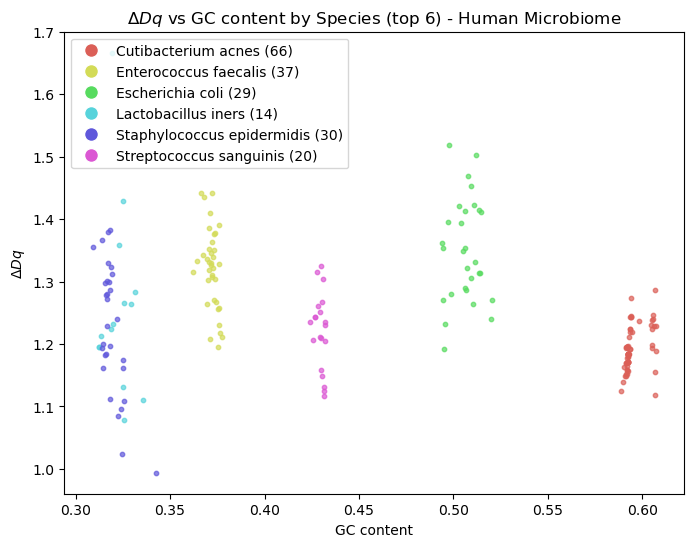

In [381]:
colors = sns.color_palette('hls', N)

plt.figure(figsize=(8, 6))

legend_handles = []

# Loop over each unique category and plot separately
for i, (category, group) in enumerate(df_filtered.groupby(taxonomic_rank)):
    num_points = len(group)

    if not category:
        continue

    plt.scatter(    
        x=group['GC_content'],
        y=group['Delta_Dq'],
        s=10,
        color=colors[i],  # Assign a unique color from the color palette
        alpha=0.7,
        label=category
    )

    # Create a custom legend handle with full opacity
    legend_handle = Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=f'{category} ({num_points})',
        markerfacecolor=colors[i],
        markersize=10
    )
    legend_handles.append(legend_handle)

# Add plot title and labels
plt.title(f'$\Delta Dq$ vs GC content by {taxonomic_rank.capitalize()} (top {N}) - Human Microbiome')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

# Show legend with custom handles
plt.legend(handles=legend_handles)#, title=taxonomic_rank.capitalize())

# Display plot
plt.show()

In [382]:
# taxonomic_rank = 'kingdom'

# Calculate the frequency counts
frequency_counts = df_combined_hm[taxonomic_rank].value_counts()

# Define the number of top categories you want to plot individually
# N = 8  # You can change this number to suit your needs

# Get the top N categories
top_categories = frequency_counts.index[:N]

# Total number of data points (excluding NaNs)
total_points = df_combined_hm[taxonomic_rank].notna().sum()
print(frequency_counts.shape)
frequency_counts[:15]


(377,)


species
Cutibacterium acnes           66
Enterococcus faecalis         37
Staphylococcus epidermidis    30
Escherichia coli              29
Streptococcus sanguinis       20
Lactobacillus iners           14
Treponema denticola           13
Lactobacillus crispatus        8
Enterococcus faecium           8
Bacteroides fragilis           7
Lactobacillus jensenii         6
Phocaeicola dorei              5
Clostridioides difficile       5
Finegoldia magna               4
Acinetobacter baumannii        4
Name: count, dtype: int64

<>:60: SyntaxWarning: invalid escape sequence '\D'
<>:60: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_40232\537863897.py:60: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content for {taxonomic_rank}: {category} - Human Microbiome')


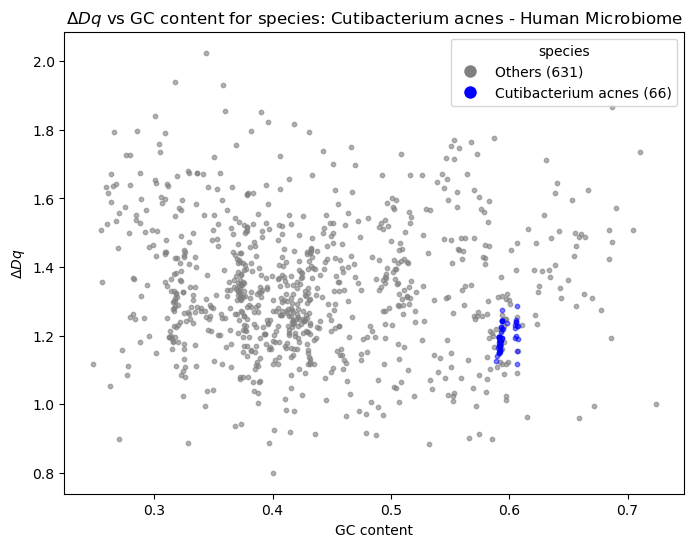

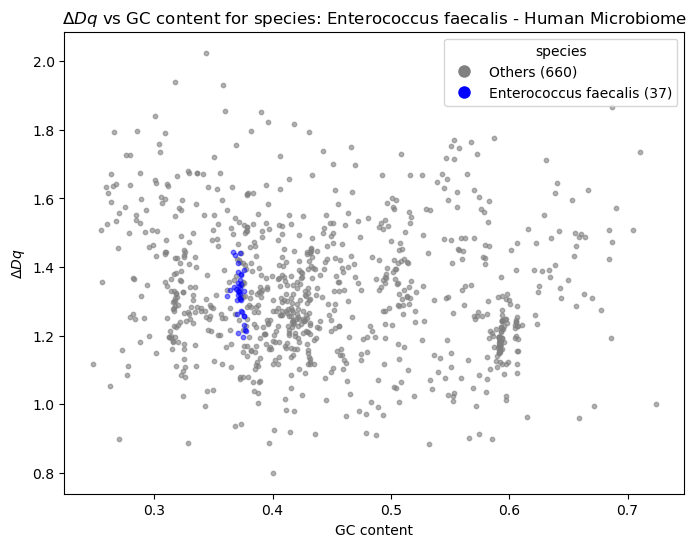

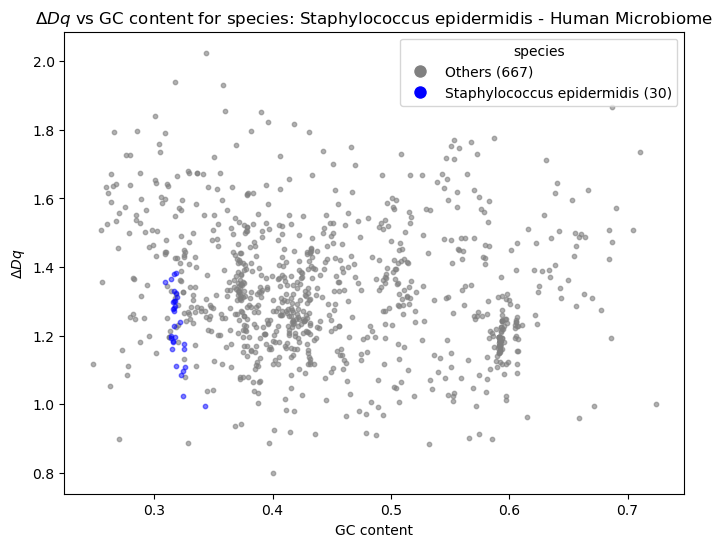

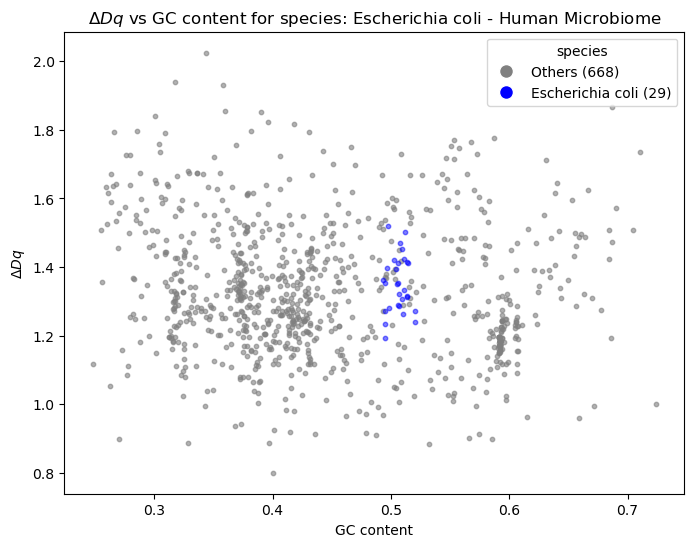

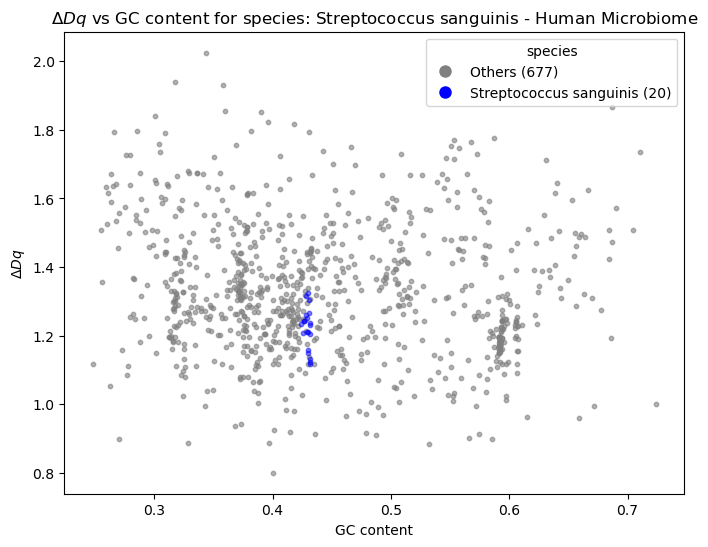

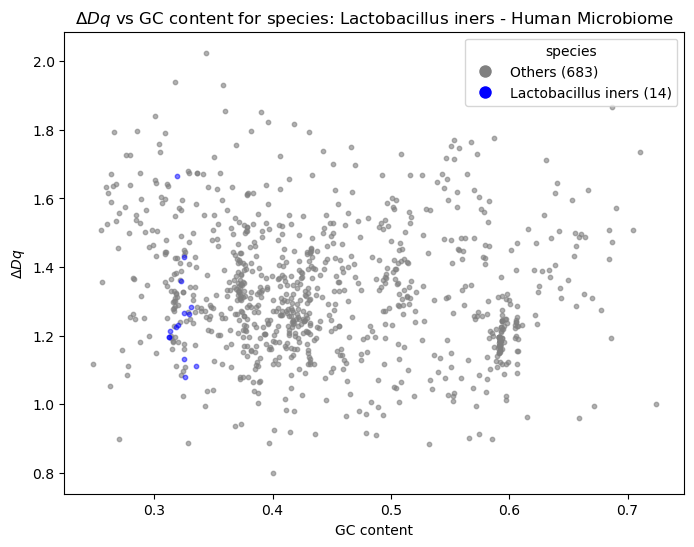

In [383]:
# Assuming 'N' and 'top_categories' have been defined earlier in your code
# Generate a list of high-contrast colors
colors = sns.color_palette('Set3', N)

# Define the neutral background color
background_color = 'gray'

# Iterate over each of the top categories to create individual plots
for i, category in enumerate(top_categories):
    plt.figure(figsize=(8, 6))
    
    # Filter data for the current category
    category_data = df_combined_hm[df_combined_hm[taxonomic_rank] == category]
    num_points = len(category_data)
    
    # Plot all data points in the background color (excluding the current category)
    background_data = df_combined_hm[df_combined_hm[taxonomic_rank] != category]
    plt.scatter(
        x=background_data['GC_content'],
        y=background_data['Delta_Dq'],
        s=10,
        color=background_color,
        alpha=0.6,
        label='_nolegend_'  # Prevent automatic legend entry
    )
    
    # Highlight the current category with a distinct color
    plt.scatter(
        x=category_data['GC_content'],
        y=category_data['Delta_Dq'],
        s=10,
        color='blue',  # Use 'colors[i]' if you want different colors per category
        alpha=0.5,
        label='_nolegend_'  # Prevent automatic legend entry
    )
    
    # Create custom legend handles with alpha=1 (fully opaque)
    legend_handles = [
        Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f'Others ({total_points - num_points})',
            markerfacecolor=background_color,
            markersize=10,
            alpha=1  # Ensure full opacity
        ),
        Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f'{category} ({num_points})',
            markerfacecolor='blue',  # Or colors[i] if using the color palette
            markersize=10,
            alpha=1  # Ensure full opacity
        )
    ]
    
    # Add plot title and labels
    plt.title(f'$\Delta Dq$ vs GC content for {taxonomic_rank}: {category} - Human Microbiome')
    plt.xlabel('GC content')
    plt.ylabel(r'$\Delta Dq$')
    
    # Show legend with custom handles
    plt.legend(handles=legend_handles, title=taxonomic_rank)
    
    # Optionally, save the plot to a file
    # plt.savefig(f'plot_{category}.png')
    
    # Display plot
    plt.show()


## Stacked Histograms

In [384]:
df_combined_hm.shape


(917, 24)

In [385]:
# taxonomic_rank = 'genus'
# N = 8
frequency_counts = df_combined_hm[taxonomic_rank].value_counts()

# Get the top N categories based on frequency
top_categories = frequency_counts.index[:N]

# Filter the DataFrame to include only the desired categories
df_filtered = df_combined_hm[df_combined_hm[taxonomic_rank].isin(top_categories)]
print(len(frequency_counts))
frequency_counts[:12]


377


species
Cutibacterium acnes           66
Enterococcus faecalis         37
Staphylococcus epidermidis    30
Escherichia coli              29
Streptococcus sanguinis       20
Lactobacillus iners           14
Treponema denticola           13
Lactobacillus crispatus        8
Enterococcus faecium           8
Bacteroides fragilis           7
Lactobacillus jensenii         6
Phocaeicola dorei              5
Name: count, dtype: int64

In [386]:
# Define the number of bins for GC content
num_bins = 20  # Adjust this number as needed

# Create bins for GC content using numpy's linspace function
gc_content_bins = np.linspace(
    0,
    1,
    num_bins + 1
)

# Bin the 'GC_content' data and assign bin labels
df_filtered['GC_content_bin'] = pd.cut(
    df_filtered['GC_content'],
    bins=gc_content_bins,
    include_lowest=True
)

# Remove any rows with NaN values in 'taxonomic_rank' or 'GC_content_bin'
df_filtered = df_filtered.dropna(subset=[taxonomic_rank, 'GC_content_bin'])

# Create a crosstab of counts per GC content bin and taxonomic rank
crosstab = pd.crosstab(
    df_filtered['GC_content_bin'],  # Rows: GC content bins
    df_filtered[taxonomic_rank]     # Columns: Taxonomic categories
)

C:\Users\Diego\AppData\Local\Temp\ipykernel_40232\1020088050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['GC_content_bin'] = pd.cut(


<Figure size 1000x750 with 0 Axes>

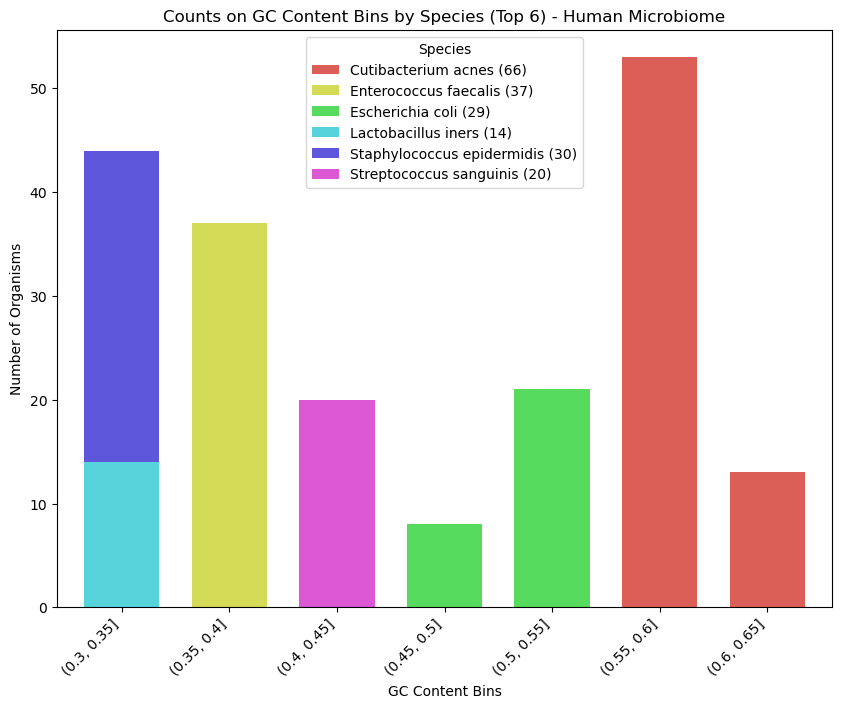

In [387]:
taxon_counts = df_filtered[taxonomic_rank].value_counts()
legend_labels = {
    taxon: f"{taxon} ({count})" for taxon, count in taxon_counts.items()
}

# Generate a color palette with N distinct colors
colors = sns.color_palette('hls', N)

# Set the figure size
plt.figure(figsize=(10, 7.5))

# Plot the stacked bar chart
ax = crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7.5),
    color=colors,  # Use the custom color palette
    width=0.7  # Set the bar width to 1.0 to make bars touch
)

# Update the legend with formatted labels
handles, labels = ax.get_legend_handles_labels()
formatted_labels = [legend_labels[label] for label in labels]
ax.legend(handles, formatted_labels, title=f'{taxonomic_rank.capitalize()}')

# Customize the plot
plt.title(f'Counts on GC Content Bins by {taxonomic_rank.capitalize()} (Top {N}) - Human Microbiome')
plt.xlabel('GC Content Bins')
plt.ylabel('Number of Organisms')
plt.xticks(rotation=45, ha='right')

# Add a legend with a title and the number of points
# plt.legend(title=f'{taxonomic_rank.capitalize()}')# ({ len(df_filtered)})') })')

# Adjust layout to prevent clipping of tick-labels
# plt.tight_layout()

plt.show()

# Stats I

In [388]:
stats_filtered = df_filtered.describe()

In [389]:
stats_filtered = stats_filtered[['seq_length', 'GC_content', 'Delta_Dq']]
stats_filtered

,seq_length,GC_content,Delta_Dq
count,1.960000e+02,196.000000,196.000000
mean,7.404695e+05,0.461157,1.253289
std,5.479772e+05,0.111767,0.096641
min,1.044740e+05,0.308991,0.993800
25%,3.297738e+05,0.369175,1.184188
50%,6.553865e+05,0.431791,1.236495
75%,8.933612e+05,0.591786,1.316731
max,2.402284e+06,0.607324,1.666758


In [390]:
stats_filtered.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [391]:
stats_subset = stats_filtered.loc[['count', 'mean', 'std', 'min', '50%', 'max']]
# rename index '50%' to 'median'
stats_subset.index = ['count', 'mean', 'std', 'min', 'median', 'max']
stats_subset

,seq_length,GC_content,Delta_Dq
count,1.960000e+02,196.000000,196.000000
mean,7.404695e+05,0.461157,1.253289
std,5.479772e+05,0.111767,0.096641
min,1.044740e+05,0.308991,0.993800
median,6.553865e+05,0.431791,1.236495
max,2.402284e+06,0.607324,1.666758


In [392]:
# stats_subset.to_csv(PATH_STATS_TAX_HM / f'stats_dq_vs_gc_hm.csv', index=True)

# Stats II

In [393]:
df_filtered[f'{taxonomic_rank}'].unique()

array(['Enterococcus faecalis', 'Escherichia coli', 'Lactobacillus iners',
       'Cutibacterium acnes', 'Staphylococcus epidermidis',
       'Streptococcus sanguinis'], dtype=object)

In [394]:
for taxon in df_filtered[f'{taxonomic_rank}'].unique():
    taxon = taxon.replace("/", "_")
    taxon_stats =df_filtered[df_filtered[f'{taxonomic_rank}'] == taxon].describe()
    taxon_stats = taxon_stats[['seq_length', 'GC_content', 'Delta_Dq']]
    taxon_stats = taxon_stats.loc[['mean', 'min', 'max']]
    taxon_stats['seq_length'] = taxon_stats['seq_length'].apply(lambda x: x/1000000)
    output_dir = PATH_STATS_TAX_HM / f'{taxonomic_rank}'
    os.makedirs(output_dir, exist_ok=True)
    taxon_stats.to_csv(output_dir / f'stats_bacteria_{taxonomic_rank}_{taxon}.csv', index=True)


# hmp: Isolation Body Site

### Data Extraction and Formatting

In [395]:
df_hmp = pd.read_csv(PATH_SCRAPED / "human_microbiome" / "hmp_catalogue.csv")
df_hmp.head()

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242",NaN,NaN
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100",NaN,NaN
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235,NaN,NaN
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974",NaN,NaN
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517,NaN,NaN


In [396]:
df_hmp.columns

Index(['HMP ID', 'GOLD ID', 'Organism Name', 'Domain', 'NCBI Superkingdom',
       'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level',
       'NCBI Submission Status', 'NCBI Project ID', 'Genbank ID', 'Gene Count',
       'IMG/HMP ID', 'HOMD ID', 'Sequencing Center', 'Funding Source',
       'Strain Repository ID', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [397]:
df_hmp = df_hmp[['HMP ID', 'GOLD ID', 'Organism Name', 'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level', 'NCBI Submission Status', 'NCBI Project ID', 'Genbank ID', 'Gene Count', 'IMG/HMP ID', 'HOMD ID', 'Strain Repository ID']]

In [398]:
df_hmp = df_hmp.rename(columns={'Organism Name': 'spaced_name'})

In [399]:
df_hmp.head()

,HMP ID,GOLD ID,spaced_name,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Strain Repository ID
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,"ATCC 49176, CIP 103242"
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,"ATCC 43553, CIP 55774, LMG 6100"
2,5,Gi03554,Achromobacter xylosoxidans C54,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,BEI HM-235
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,"ATCC 19606, DSM 6974"
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,LMG 10517


In [400]:
df_hmp['formatted_name_ncbi'] = df_hmp['spaced_name'].str.replace(' ', '_')
df_hmp = df_hmp[['spaced_name', 'formatted_name_ncbi', 'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level', 'NCBI Submission Status','HMP ID', 'GOLD ID',  'NCBI Project ID', 'Genbank ID', 'Gene Count', 'IMG/HMP ID', 'HOMD ID', 'Strain Repository ID']]

df_hmp.head()

,spaced_name,formatted_name_ncbi,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,HMP ID,GOLD ID,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Strain Repository ID
0,Abiotrophia defectiva ATCC 49176,Abiotrophia_defectiva_ATCC_49176,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,1,Gi03551,33011,ACIN00000000,1950,643886181,HOMD: tax_389,"ATCC 49176, CIP 103242"
1,Achromobacter piechaudii ATCC 43553,Achromobacter_piechaudii_ATCC_43553,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,4,Gi03555,46343,ADMS00000000,5755,647000200,NaN,"ATCC 43553, CIP 55774, LMG 6100"
2,Achromobacter xylosoxidans C54,Achromobacter_xylosoxidans_C54,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,5,Gi03554,38739,ACRC00000000,6010,0,HOMD: tax_343,BEI HM-235
3,Acinetobacter baumannii ATCC 19606,Acinetobacter_baumannii_ATCC_19606,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,10,Gi03422,38509,ACQB00000000,3832,647533101,HOMD: tax_554,"ATCC 19606, DSM 6974"
4,Acinetobacter calcoaceticus RUH2202,Acinetobacter_calcoaceticus_RUH2202,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,12,Gi03421,38337,ACPK00000000,3632,646206267,NaN,LMG 10517


In [401]:
# If df_combined_hm['name'] has '___', eliminate it and everything after it
df_combined_hm['name'] = df_combined_hm['name'].str.split('___').str[0]

In [402]:
df_combined_hm.head()

,name,formatted_name_ncbi,url_x,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq,url_y,no rank,superkingdom,kingdom,phylum,class,order,family,genus,species,species group,clade,subspecies
0,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_piechaudii_ATCC_43553_uid46343/,NZ_GG770409,6115515,0.638748,-20.0,-63.263013,3.012524,0.992758,1.615916,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=742159,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter piechaudii,<NA>,<NA>,<NA>
1,Achromobacter_xylosoxidans_C54_uid38739,Achromobacter_xylosoxidans_C54,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_xylosoxidans_C54_uid38739/,NZ_GL636060,741255,0.655275,-20.0,-60.465531,2.879311,0.981706,1.499203,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=562971,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter xylosoxidans,<NA>,<NA>,<NA>
2,Acidaminococcus_D21_uid34117,Acidaminococcus_D21,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Acidaminococcus_D21_uid34117/,NZ_ACGB01000001,138060,0.488853,-20.0,-55.118059,2.624669,0.986374,1.070254,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Acinetobacter_ATCC_27244_uid30949,Acinetobacter_ATCC_27244,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Acinetobacter_ATCC_27244_uid30949/,NZ_GG665949,481320,0.378322,-20.0,-60.156267,2.864584,0.985111,1.249041,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Acinetobacter_baumannii_6013113_uid33017,Acinetobacter_baumannii_6013113,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Acinetobacter_baumannii_6013113_uid33017/,NZ_GL891580,349645,0.396056,-20.0,-58.450265,2.783346,0.984739,1.237412,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=592014,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter baumannii,Acinetobacter calcoaceticus/baumannii complex,<NA>,<NA>


In [403]:
df_combined_hm_hmp = pd.merge(df_combined_hm, df_hmp, on='formatted_name_ncbi', how='left')
df_combined_hm_hmp.columns

Index(['name', 'formatted_name_ncbi', 'url_x', 'sequence', 'seq_length',
       'GC_content', 'Q', 'Tau(Q)', 'D(Q)', 'r_squared', 'Delta_Dq', 'url_y',
       'no rank', 'superkingdom', 'kingdom', 'phylum', 'class', 'order',
       'family', 'genus', 'species', 'species group', 'clade', 'subspecies',
       'spaced_name', 'HMP Isolation Body Site', 'Project Status',
       'Current Finishing Level', 'NCBI Submission Status', 'HMP ID',
       'GOLD ID', 'NCBI Project ID', 'Genbank ID', 'Gene Count', 'IMG/HMP ID',
       'HOMD ID', 'Strain Repository ID'],
      dtype='object')

In [404]:
df_combined_hm_hmp = df_combined_hm_hmp[['name', 'HMP Isolation Body Site', 'formatted_name_ncbi', 'url_x', 'sequence', 'seq_length',
       'GC_content', 'Q', 'Tau(Q)', 'D(Q)', 'r_squared', 'Delta_Dq', 'url_y',
       'no rank', 'superkingdom', 'kingdom', 'phylum', 'class', 'order',
       'family', 'genus', 'species', 'species group', 'clade', 'subspecies',
       'spaced_name', 'Project Status',
       'Current Finishing Level', 'NCBI Submission Status', 'HMP ID',
       'GOLD ID', 'NCBI Project ID', 'Genbank ID', 'Gene Count', 'IMG/HMP ID',
       'HOMD ID', 'Strain Repository ID']]
df_combined_hm_hmp.head()

,name,HMP Isolation Body Site,formatted_name_ncbi,url_x,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq,url_y,no rank,superkingdom,kingdom,phylum,class,order,family,genus,species,species group,clade,subspecies,spaced_name,Project Status,Current Finishing Level,NCBI Submission Status,HMP ID,GOLD ID,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Strain Repository ID
0,Achromobacter_piechaudii_ATCC_43553_uid46343,airways,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_piechaudii_ATCC_43553_uid46343/,NZ_GG770409,6115515,0.638748,-20.0,-63.263013,3.012524,0.992758,1.615916,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=742159,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter piechaudii,<NA>,<NA>,<NA>,Achromobacter piechaudii ATCC 43553,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,4.0,Gi03555,46343.0,ADMS00000000,5755.0,647000200.0,NaN,"ATCC 43553, CIP 55774, LMG 6100"
1,Achromobacter_xylosoxidans_C54_uid38739,airways,Achromobacter_xylosoxidans_C54,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Achromobacter_xylosoxidans_C54_uid38739/,NZ_GL636060,741255,0.655275,-20.0,-60.465531,2.879311,0.981706,1.499203,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=562971,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter xylosoxidans,<NA>,<NA>,<NA>,Achromobacter xylosoxidans C54,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,5.0,Gi03554,38739.0,ACRC00000000,6010.0,0.0,HOMD: tax_343,BEI HM-235
2,Acidaminococcus_D21_uid34117,NaN,Acidaminococcus_D21,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Acidaminococcus_D21_uid34117/,NZ_ACGB01000001,138060,0.488853,-20.0,-55.118059,2.624669,0.986374,1.070254,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acinetobacter_ATCC_27244_uid30949,NaN,Acinetobacter_ATCC_27244,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Acinetobacter_ATCC_27244_uid30949/,NZ_GG665949,481320,0.378322,-20.0,-60.156267,2.864584,0.985111,1.249041,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Acinetobacter_baumannii_6013113_uid33017,skin,Acinetobacter_baumannii_6013113,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MICROBIOM/Bacteria/Acinetobacter_baumannii_6013113_uid33017/,NZ_GL891580,349645,0.396056,-20.0,-58.450265,2.783346,0.984739,1.237412,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=592014,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter baumannii,Acinetobacter calcoaceticus/baumannii complex,<NA>,<NA>,Acinetobacter baumannii 6013113,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,20.0,Gi03494,33017.0,ACYR00000000,4010.0,647000203.0,NaN,NCTC 13487


## Plot: By HMP Isolation Body Site

In [405]:
df_combined_hm_hmp['HMP Isolation Body Site'].value_counts().to_dict()

{'gastrointestinal_tract': 148,
 'oral': 113,
 'skin': 95,
 'unknown': 89,
 'urogenital_tract': 45,
 'airways': 31,
 'blood': 30,
 'lymph_nodes': 1,
 'heart': 1}

In [406]:
# Define the values of interest for column ['HMP Isolation Body Site']
body_sites_list = ['airways', 'skin', 'gastrointestinal_tract', 'urogenital_tract', 'oral', 'unknown', 'blood', 'lymph_nodes', 'heart']

# Get df_combined_hm_hmp['HMP Isolation Body Site'].value_counts() as a dict
unique_counts = df_combined_hm_hmp['HMP Isolation Body Site'].value_counts().to_dict()
# unique_counts = {column: df_combined_hm_hmp[column].nunique() for column in body_site_columns}

# Convert the dictionary to a DataFrame for better readability
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Count'])

# Display the DataFrame
unique_counts_df


,Column,Unique Count
0,gastrointestinal_tract,148
1,oral,113
2,skin,95
3,unknown,89
4,urogenital_tract,45
5,airways,31
6,blood,30
7,lymph_nodes,1
8,heart,1


In [407]:
df_combined_hm_hmp.columns

Index(['name', 'HMP Isolation Body Site', 'formatted_name_ncbi', 'url_x',
       'sequence', 'seq_length', 'GC_content', 'Q', 'Tau(Q)', 'D(Q)',
       'r_squared', 'Delta_Dq', 'url_y', 'no rank', 'superkingdom', 'kingdom',
       'phylum', 'class', 'order', 'family', 'genus', 'species',
       'species group', 'clade', 'subspecies', 'spaced_name', 'Project Status',
       'Current Finishing Level', 'NCBI Submission Status', 'HMP ID',
       'GOLD ID', 'NCBI Project ID', 'Genbank ID', 'Gene Count', 'IMG/HMP ID',
       'HOMD ID', 'Strain Repository ID'],
      dtype='object')

<>:64: SyntaxWarning: invalid escape sequence '\D'
<>:64: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_40232\339903686.py:64: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content by Body Site - Human Microbiome')


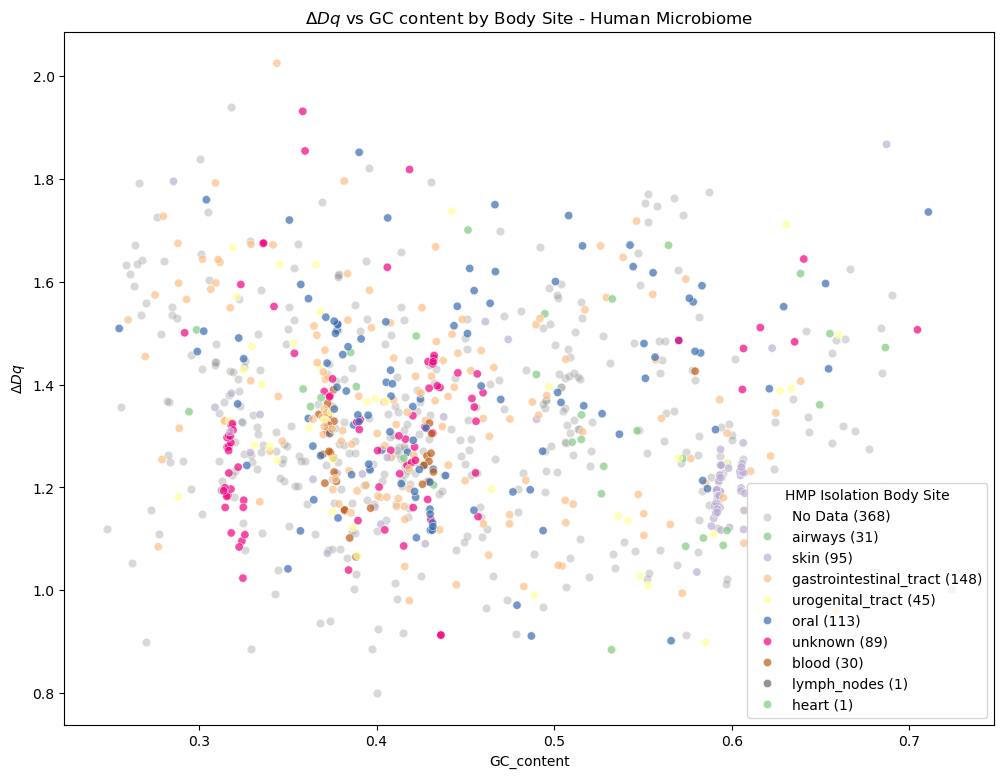

In [408]:
# Step 1: Separate rows with missing and non-missing values for 'HMP Isolation Body Site'
missing_data = df_combined_hm_hmp[df_combined_hm_hmp['HMP Isolation Body Site'].isna() ]
valid_data = df_combined_hm_hmp[~df_combined_hm_hmp['HMP Isolation Body Site'].isna()]

# Step 1a: Calculate counts
# Count of valid data points per body site
body_site_counts = valid_data['HMP Isolation Body Site'].value_counts()

# Count of missing data points
missing_count = missing_data.shape[0]

# Step 2: Create the scatterplot
plt.figure(figsize=(12, 9))

# Plot gray points for missing values
sns.scatterplot(
    x='GC_content',
    y='Delta_Dq',
    data=missing_data,
    color='gray',
    label='No Data',
    alpha=0.3
)

# Plot colored points for non-missing values with hue
scatter = sns.scatterplot(
    x='GC_content',
    y='Delta_Dq',
    hue='HMP Isolation Body Site',
    data=valid_data,
    palette='Accent',  # Options: 'viridis', 'magma', 'inferno'
    alpha=0.7
)

# Step 3: Update legend labels to include counts
# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Create a mapping from body site to count
counts_dict = body_site_counts.to_dict()

# Initialize a list for updated labels
new_labels = []

# Update labels to include counts
for label in labels:
    if label == 'No Data':
        new_label = f'{label} ({missing_count})'
    elif label in counts_dict:
        new_label = f'{label} ({counts_dict[label]})'
    elif label == 'HMP Isolation Body Site':  # Skip the title in legend labels
        new_label = label
    else:
        new_label = label  # For any other labels that might appear
    new_labels.append(new_label)

# Remove the old legend
scatter.legend_.remove()

# Add the updated legend with counts
plt.legend(handles=handles, labels=new_labels, title='HMP Isolation Body Site')

# Step 4: Add titles and labels
plt.title(f'$\Delta Dq$ vs GC content by Body Site - Human Microbiome')
plt.xlabel('GC_content')
plt.ylabel(r'$\Delta Dq$')
plt.show()


In [409]:
def plot_body_site_highlight(df, x_col, y_col, body_site_col):
    # Get the list of unique body sites excluding missing values
    body_sites = df[body_site_col].dropna().unique()
    
    # Data points with missing 'HMP Isolation Body Site'
    missing_data = df[df[body_site_col].isna()]
    missing_count = len(missing_data)
    
    # Loop over each body site
    for site in body_sites:
        plt.figure(figsize=(8, 6))
        
        # Data points for the current body site
        site_data = df[df[body_site_col] == site]
        current_count = len(site_data)
        
        # Data points for other body sites (excluding missing values)
        other_data = df[(df[body_site_col] != site) & (df[body_site_col].notna())]
        other_count = len(other_data)
        
        # Plot gray points for other body sites
        sns.scatterplot(
            x=x_col,
            y=y_col,
            data=other_data,
            color='gray',
            alpha=0.3,
            legend=False
        )
        
        # Plot light gray points for missing data
        sns.scatterplot(
            x=x_col,
            y=y_col,
            data=missing_data,
            color='lightgray',
            alpha=0.3,
            legend=False
        )
        
        # Plot blue points for the current body site
        sns.scatterplot(
            x=x_col,
            y=y_col,
            data=site_data,
            color='blue',
            alpha=0.7,
            legend=False
        )
        
        # Create custom legend handles with counts
        handles = [
            mpatches.Patch(color='blue', label=f'{site} ({current_count})'),
            mpatches.Patch(color='gray', label=f'Other Sites ({other_count})'),
            # mpatches.Patch(color='lightgray', label=f'Missing Data ({missing_count})'),
        ]
        
        # Add legend and labels
        plt.legend(handles=handles, title=body_site_col)
        plt.title(f'$\Delta Dq$ vs GC content for Body Site: {site} - Human Microbiome')
        plt.xlabel(x_col)
        plt.ylabel(r'$\Delta Dq$')
        plt.show()


<>:60: SyntaxWarning: invalid escape sequence '\D'
<>:60: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_40232\1043263457.py:60: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content for Body Site: {site} - Human Microbiome')


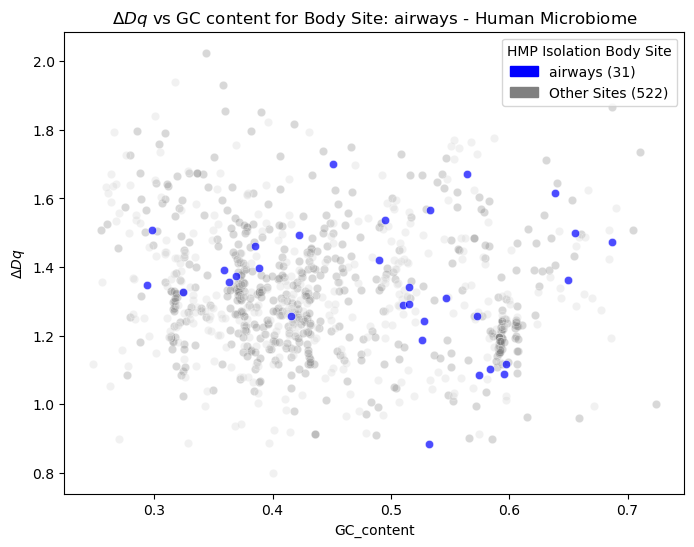

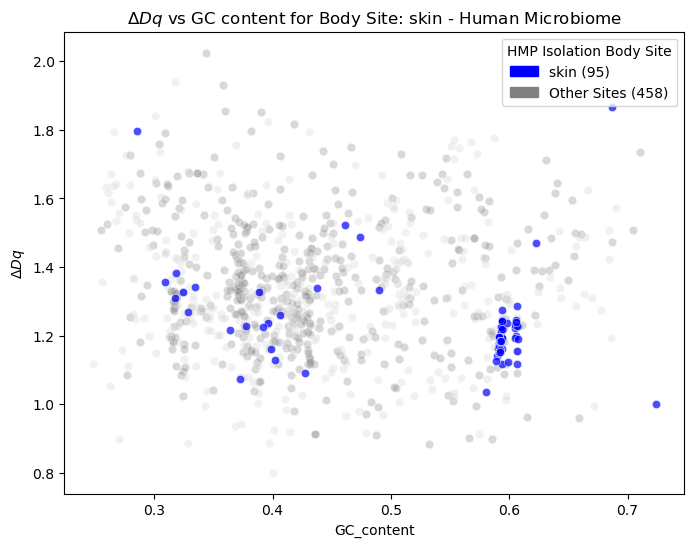

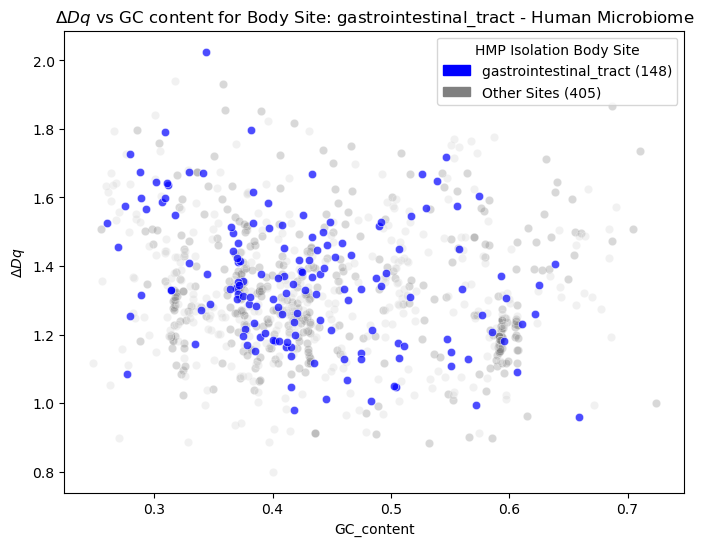

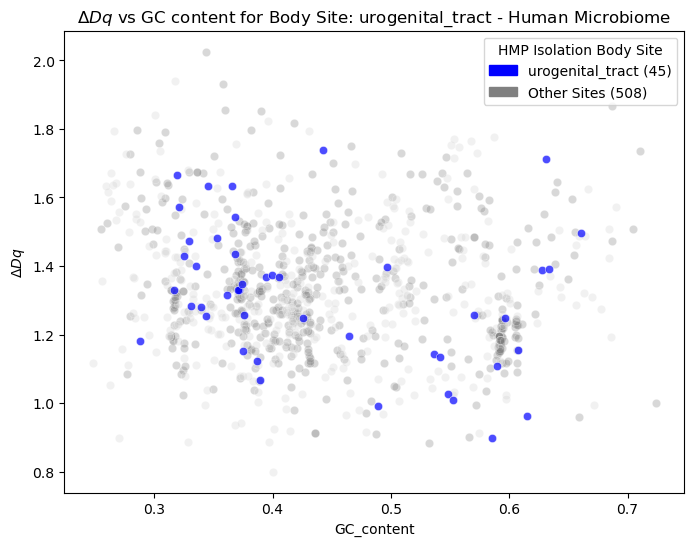

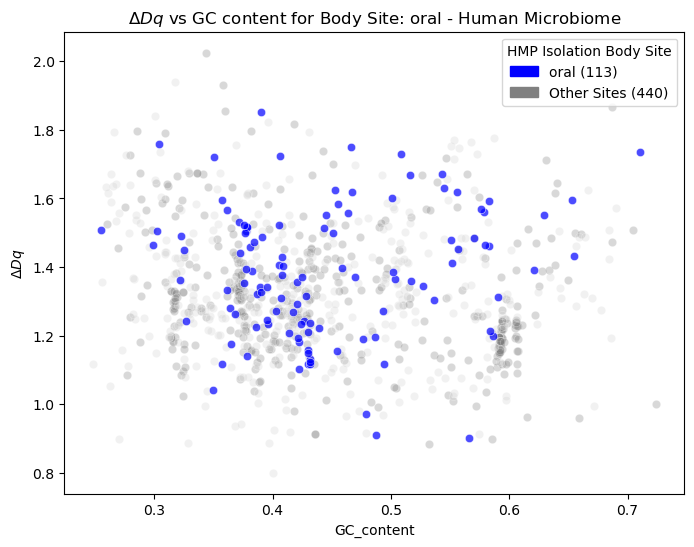

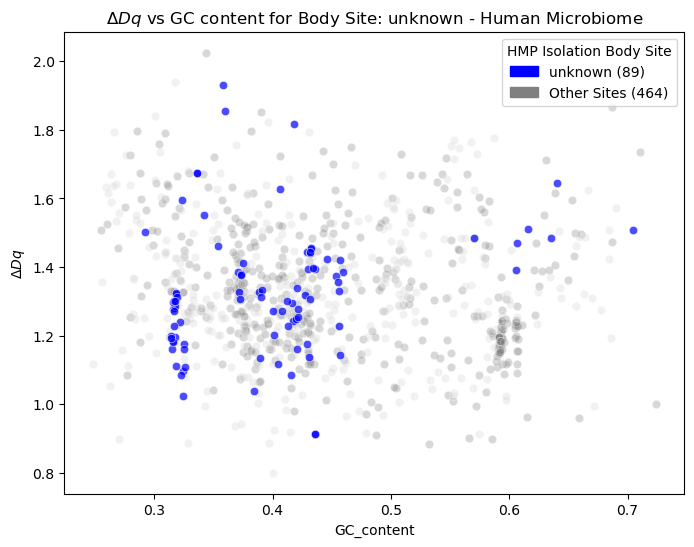

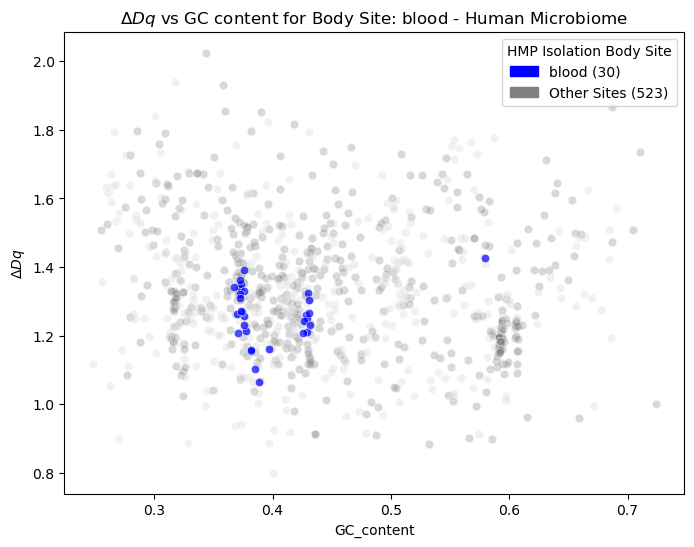

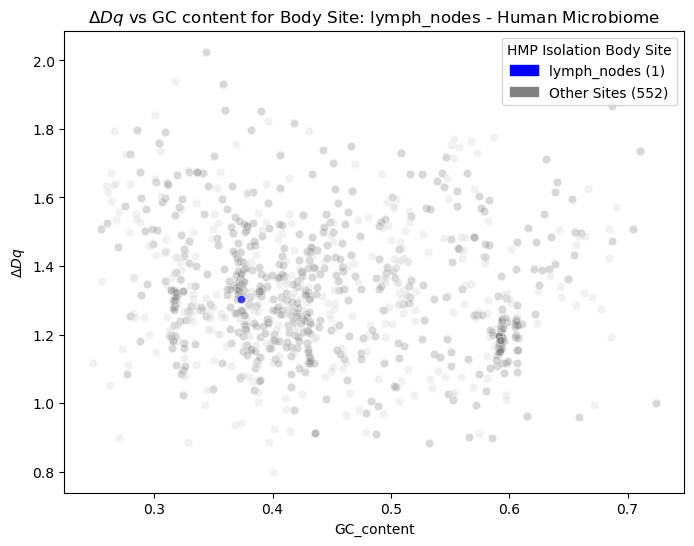

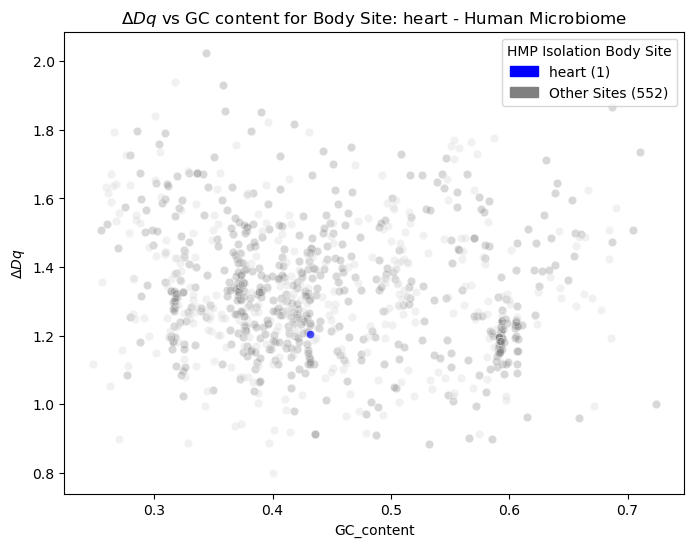

In [410]:
plot_body_site_highlight(
    df=df_combined_hm_hmp,
    x_col='GC_content',
    y_col='Delta_Dq',
    body_site_col='HMP Isolation Body Site'
)


### Stacked Histogram   

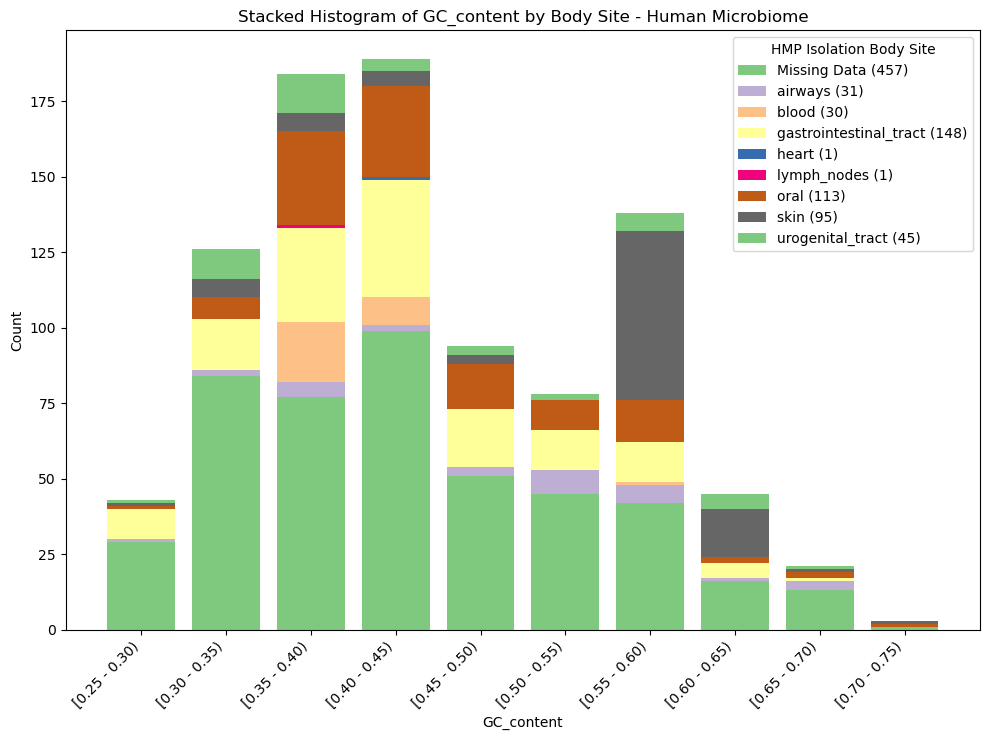

In [411]:
# Handle missing data
df_combined_hm_hmp['Body Site Plot'] = df_combined_hm_hmp['HMP Isolation Body Site'].fillna('Missing Data').replace('unknown', 'Missing Data')


# Define the variable to plot
variable_to_plot = 'GC_content'  # Or 'Delta_Dq', etc.

# Define bins by interval size
bin_size = 0.05  # Adjust as needed
data_min = df_combined_hm_hmp[variable_to_plot].min()
data_max = df_combined_hm_hmp[variable_to_plot].max()
bins = np.arange(data_min, data_max + bin_size, bin_size)

# Create bin interval labels
bin_labels = [f"[{bins[i]:.2f} - {bins[i+1]:.2f})" for i in range(len(bins)-1)]

# Prepare histogram data for each category
categories = df_combined_hm_hmp['Body Site Plot'].unique()
categories.sort()
palette = sns.color_palette('Accent', n_colors=len(categories))
color_dict = dict(zip(categories, palette))

hist_data = {}
for category in categories:
    data = df_combined_hm_hmp[df_combined_hm_hmp['Body Site Plot'] == category][variable_to_plot]
    counts, _ = np.histogram(data, bins=bins)
    hist_data[category] = counts

# Calculate bin centers and adjust bar width
bin_centers = (bins[:-1] + bins[1:]) / 2
bar_width = bin_size * 0.8  # 80% of bin size

# Plot the stacked histogram with spaced bars
plt.figure(figsize=(10, 7.5))  # Increased figure width

bottom = np.zeros(len(bin_centers))

for category in categories:
    counts = hist_data[category]
    plt.bar(
        bin_centers,
        counts,
        width=bar_width,
        bottom=bottom,
        color=color_dict[category],
        edgecolor='none',
        label=f"{category} ({counts.sum()})"
    )
    bottom += counts

# Set x-ticks to bin centers with interval labels
plt.xticks(ticks=bin_centers, labels=bin_labels, rotation=45, ha='right')

# Add legend
plt.legend(title='HMP Isolation Body Site')

# Add labels and title
plt.xlabel(variable_to_plot)
plt.ylabel('Count')
plt.title(f'Stacked Histogram of {variable_to_plot} by Body Site - Human Microbiome')

# Adjust layout to prevent clipping of tick labels
plt.tight_layout()
plt.show()


# Stats III

In [412]:
df_combined_hm_hmp['HMP Isolation Body Site'].unique()


array(['airways', nan, 'skin', 'gastrointestinal_tract',
       'urogenital_tract', 'oral', 'unknown', 'blood', 'lymph_nodes',
       'heart'], dtype=object)

In [413]:
df_filtered_stats = df_combined_hm_hmp[(df_combined_hm_hmp['HMP Isolation Body Site'].notna()) & (df_combined_hm_hmp['HMP Isolation Body Site'] != 'unknown')]
df_filtered_stats['HMP Isolation Body Site'].value_counts(dropna=False)

HMP Isolation Body Site
gastrointestinal_tract    148
oral                      113
skin                       95
urogenital_tract           45
airways                    31
blood                      30
lymph_nodes                 1
heart                       1
Name: count, dtype: int64

In [414]:
df_filtered_stats['HMP Isolation Body Site'].unique()

array(['airways', 'skin', 'gastrointestinal_tract', 'urogenital_tract',
       'oral', 'blood', 'lymph_nodes', 'heart'], dtype=object)

In [415]:
df_filtered_stats['HMP Isolation Body Site'].value_counts(dropna=False)


HMP Isolation Body Site
gastrointestinal_tract    148
oral                      113
skin                       95
urogenital_tract           45
airways                    31
blood                      30
lymph_nodes                 1
heart                       1
Name: count, dtype: int64

In [416]:
df_filtered_stats.columns

Index(['name', 'HMP Isolation Body Site', 'formatted_name_ncbi', 'url_x',
       'sequence', 'seq_length', 'GC_content', 'Q', 'Tau(Q)', 'D(Q)',
       'r_squared', 'Delta_Dq', 'url_y', 'no rank', 'superkingdom', 'kingdom',
       'phylum', 'class', 'order', 'family', 'genus', 'species',
       'species group', 'clade', 'subspecies', 'spaced_name', 'Project Status',
       'Current Finishing Level', 'NCBI Submission Status', 'HMP ID',
       'GOLD ID', 'NCBI Project ID', 'Genbank ID', 'Gene Count', 'IMG/HMP ID',
       'HOMD ID', 'Strain Repository ID', 'Body Site Plot'],
      dtype='object')

In [417]:
stats_columns = ['seq_length', 'GC_content', 'Delta_Dq']

In [418]:
# for site in df_filtered_stats['HMP Isolation Body Site'].unique():
#     site_stats = df_filtered_stats[df_filtered_stats['HMP Isolation Body Site'] == site].describe()

#     site_stats = site_stats[stats_columns]
#     site_stats = site_stats.loc[['mean', 'min', 'max']]
#     site_stats['seq_length'] = site_stats['seq_length'].apply(lambda x: x/1000000)
#     site_stats.to_csv(PATH_STATS_SITE_HM / f'stats_hm_{site}.csv', index=True)